# Energy Output Prediction

In [33]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [34]:
#importing dataset
import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_63e5bc1e69c84ed5bcd352fcb93a0f75 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='oNidAnQKv59LsLjj1tOUH5G4cyCp2VGh90B4eEu9pEWd',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.eu-geo.objectstorage.service.networklayer.com')

body = client_63e5bc1e69c84ed5bcd352fcb93a0f75.get_object(Bucket='energyoutputprediction-donotdelete-pr-izj1mmsmuukeo6',Key='T1.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_data_1 = pd.read_csv(body)
df_data_1.head()


,Date/Time,LV ActivePower (kW),Wind Speed (m/s),Theoretical_Power_Curve (KWh),Wind Direction (°)
0,01 01 2018 00:00,380.047791,5.311336,416.328908,259.994904
1,01 01 2018 00:10,453.769196,5.672167,519.917511,268.641113
2,01 01 2018 00:20,306.376587,5.216037,390.900016,272.564789
3,01 01 2018 00:30,419.645905,5.659674,516.127569,271.258087
4,01 01 2018 00:40,380.650696,5.577941,491.702972,265.674286


In [35]:
df_data_1.tail()

,Date/Time,LV ActivePower (kW),Wind Speed (m/s),Theoretical_Power_Curve (KWh),Wind Direction (°)
50525,31 12 2018 23:10,2963.980957,11.404030,3397.190793,80.502724
50526,31 12 2018 23:20,1684.353027,7.332648,1173.055771,84.062599
50527,31 12 2018 23:30,2201.106934,8.435358,1788.284755,84.742500
50528,31 12 2018 23:40,2515.694092,9.421366,2418.382503,84.297913
50529,31 12 2018 23:50,2820.466064,9.979332,2779.184096,82.274620


In [36]:
#Analyzing the data
df_data_1.info()
df_data_1.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50530 entries, 0 to 50529
Data columns (total 5 columns):
Date/Time                        50530 non-null object
LV ActivePower (kW)              50530 non-null float64
Wind Speed (m/s)                 50530 non-null float64
Theoretical_Power_Curve (KWh)    50530 non-null float64
Wind Direction (°)               50530 non-null float64
dtypes: float64(4), object(1)
memory usage: 1.9+ MB


,LV ActivePower (kW),Wind Speed (m/s),Theoretical_Power_Curve (KWh),Wind Direction (°)
count,50530.000000,50530.000000,50530.000000,50530.000000
mean,1307.684332,7.557952,1492.175463,123.687559
std,1312.459242,4.227166,1368.018238,93.443736
min,-2.471405,0.000000,0.000000,0.000000
25%,50.677890,4.201395,161.328167,49.315437
50%,825.838074,7.104594,1063.776283,73.712978
75%,2482.507568,10.300020,2964.972462,201.696720
max,3618.732910,25.206011,3600.000000,359.997589


In [37]:
df_data_1.columns

Index(['Date/Time', 'LV ActivePower (kW)', 'Wind Speed (m/s)',
       'Theoretical_Power_Curve (KWh)', 'Wind Direction (°)'],
      dtype='object')

In [38]:

sns.__version__

'0.9.0'

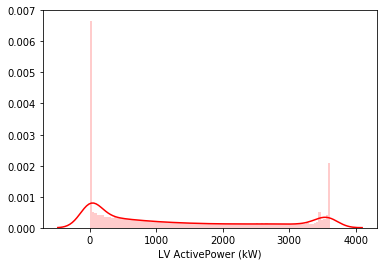

In [39]:
sns.distplot(df_data_1['LV ActivePower (kW)'], color='r', bins=100,hist_kws={'alpha':0.2})

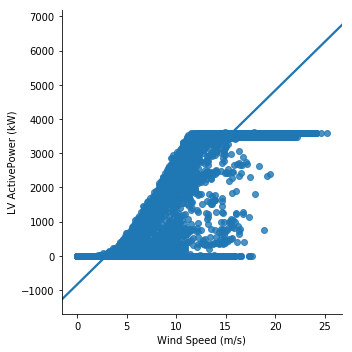

In [40]:
sns.lmplot(x='Wind Speed (m/s)',y='LV ActivePower (kW)',data=df_data_1)



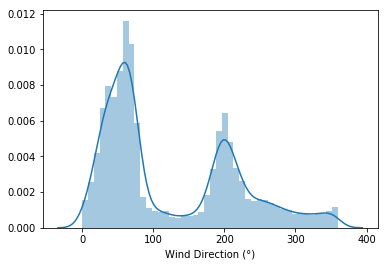

In [41]:
sns.distplot(a=df_data_1['Wind Direction (°)'])


#### EXTRACTING MONTH

In [42]:
from datetime import datetime

In [43]:
df_data_1['month'] = pd.DatetimeIndex(df_data_1['Date/Time']).month

In [44]:
def mean_direction(x):
    list=[]
    i=15
    while i<=375:
        list.append(i)
        i+=30
        
    for i in list:
        if x < i:
            x=i-15
            if x==360:
                return 0
            else:
                return x

In [45]:
df_data_1["mean_Direction"]=df_data_1["Wind Direction (°)"].apply(mean_direction)
df_data_1.head()

,Date/Time,LV ActivePower (kW),Wind Speed (m/s),Theoretical_Power_Curve (KWh),Wind Direction (°),month,mean_Direction
0,01 01 2018 00:00,380.047791,5.311336,416.328908,259.994904,1,270
1,01 01 2018 00:10,453.769196,5.672167,519.917511,268.641113,1,270
2,01 01 2018 00:20,306.376587,5.216037,390.900016,272.564789,1,270
3,01 01 2018 00:30,419.645905,5.659674,516.127569,271.258087,1,270
4,01 01 2018 00:40,380.650696,5.577941,491.702972,265.674286,1,270


In [46]:
def find_direction(x):
    if x==0:
        return 1
    if x==30:
        return 2
    if x==60:
        return 3 
    if x==90:
        return 4 
    if x==120:
        return 5 
    if x==150:
        return 6 
    if x==180:
        return 7 
    if x==210:
        return 8 
    if x==240:
        return 9 
    if x==270:
        return 10 
    if x==300:
        return 11 
    if x==330:
        return 12

In [47]:
df_data_1["Direction"]=df_data_1["mean_Direction"].apply(find_direction)
df_data_1.head()

,Date/Time,LV ActivePower (kW),Wind Speed (m/s),Theoretical_Power_Curve (KWh),Wind Direction (°),month,mean_Direction,Direction
0,01 01 2018 00:00,380.047791,5.311336,416.328908,259.994904,1,270,10
1,01 01 2018 00:10,453.769196,5.672167,519.917511,268.641113,1,270,10
2,01 01 2018 00:20,306.376587,5.216037,390.900016,272.564789,1,270,10
3,01 01 2018 00:30,419.645905,5.659674,516.127569,271.258087,1,270,10
4,01 01 2018 00:40,380.650696,5.577941,491.702972,265.674286,1,270,10


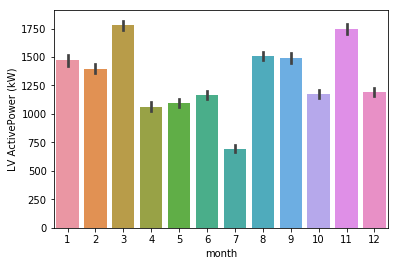

In [48]:
#LV power average in different months
sns.barplot(x=df_data_1['month'],y=df_data_1['LV ActivePower (kW)'])

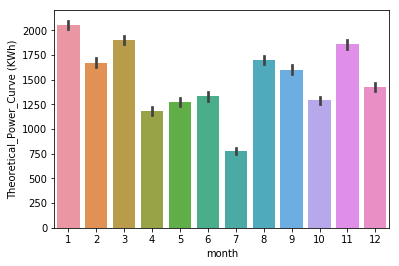

In [49]:
sns.barplot(x=df_data_1['month'],y=df_data_1['Theoretical_Power_Curve (KWh)'])

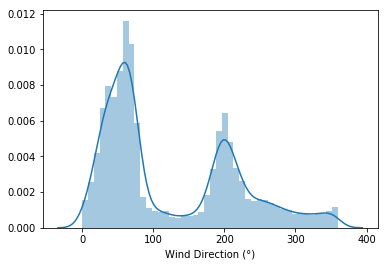

In [50]:
sns.distplot(df_data_1['Wind Direction (°)'])

In [51]:
type(df_data_1)

pandas.core.frame.DataFrame

In [52]:
df_data_1['LV ActivePower (kW)'][(df_data_1['LV ActivePower (kW)']==0) & (df_data_1['Wind Speed (m/s)']>3.5) ].count()

2217

In [53]:
df_data_1.drop(df_data_1[(df_data_1['LV ActivePower (kW)']==0) & (df_data_1['Wind Speed (m/s)']>3.5) ].index,inplace=True)

In [54]:
df_data_1.index=range(len(df_data_1))

In [55]:
df_data_1

,Date/Time,LV ActivePower (kW),Wind Speed (m/s),Theoretical_Power_Curve (KWh),Wind Direction (°),month,mean_Direction,Direction
0,01 01 2018 00:00,380.047791,5.311336,416.328908,259.994904,1,270,10
1,01 01 2018 00:10,453.769196,5.672167,519.917511,268.641113,1,270,10
2,01 01 2018 00:20,306.376587,5.216037,390.900016,272.564789,1,270,10
3,01 01 2018 00:30,419.645905,5.659674,516.127569,271.258087,1,270,10
4,01 01 2018 00:40,380.650696,5.577941,491.702972,265.674286,1,270,10
5,01 01 2018 00:50,402.391998,5.604052,499.436385,264.578613,1,270,10
6,01 01 2018 01:00,447.605713,5.793008,557.372363,266.163605,1,270,10
7,01 01 2018 01:10,387.242188,5.306050,414.898179,257.949493,1,270,10
8,01 01 2018 01:20,463.651215,5.584629,493.677652,253.480698,1,240,9
9,01 01 2018 01:30,439.725708,5.523228,475.706783,258.723785,1,270,10


In [56]:
df_data_1['diff']=df_data_1['Wind Speed (m/s)']-df_data_1['Wind Speed (m/s)'].shift(1)[:]
df_data_1['diff']

0             NaN
1        0.360831
2       -0.456130
3        0.443637
4       -0.081733
5        0.026111
6        0.188956
7       -0.486958
8        0.278579
9       -0.061401
10       0.200888
11       0.210083
12       0.613215
13      -0.347668
14       0.305637
15       0.128733
16      -0.255203
17       0.067740
18      -0.031570
19       0.022448
20      -0.217507
21       0.678002
22       0.711685
23      -0.321355
24       0.654746
25       0.433060
26      -0.139204
27      -0.357367
28      -0.778215
29      -0.146069
           ...   
48283    0.202743
48284    0.584585
48285   -0.303567
48286    0.667502
48287    1.790259
48288    0.413881
48289    0.324336
48290   -0.538644
48291   -0.649324
48292    0.007173
48293    0.230949
48294    1.261817
48295    0.727519
48296   -1.215384
48297    1.136988
48298   -1.162792
48299   -0.039404
48300    1.543238
48301    0.440170
48302    0.296840
48303   -0.559120
48304    1.913111
48305    0.127999
48306    0.296850
48307    0

In [57]:
df_data_1.describe()

,LV ActivePower (kW),Wind Speed (m/s),Theoretical_Power_Curve (KWh),Wind Direction (°),month,mean_Direction,Direction,diff
count,48313.000000,48313.000000,48313.000000,48313.000000,48313.000000,48313.000000,48313.000000,48312.000000
mean,1367.691704,7.584808,1504.010263,124.291200,6.643719,118.339577,4.944653,0.000097
std,1311.305617,4.274504,1375.027496,93.271962,3.324947,90.461847,3.015395,0.751637
min,-2.471405,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,-17.914280
25%,120.164101,4.192660,159.625118,50.099098,4.000000,60.000000,3.000000,-0.378772
50%,924.296509,7.139705,1080.139085,73.949280,7.000000,60.000000,3.000000,0.000454
75%,2566.322998,10.381380,3007.323841,201.751099,10.000000,210.000000,8.000000,0.374285
max,3618.732910,25.206011,3600.000000,359.997589,12.000000,330.000000,12.000000,17.397060


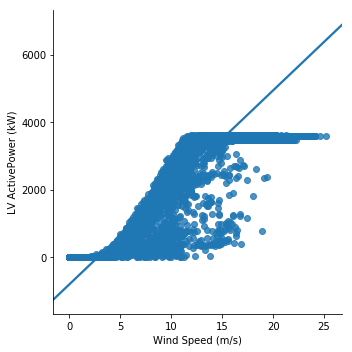

In [58]:
sns.lmplot(x='Wind Speed (m/s)',y='LV ActivePower (kW)',data=df_data_1)

In [59]:
#corelation of numerical data
num_corr=df_data_1.corr()['LV ActivePower (kW)'][:]
print(num_corr)
#print coerr


LV ActivePower (kW)              1.000000
Wind Speed (m/s)                 0.938366
Theoretical_Power_Curve (KWh)    0.980337
Wind Direction (°)              -0.072508
month                           -0.038940
mean_Direction                  -0.036772
Direction                       -0.036772
diff                             0.066683
Name: LV ActivePower (kW), dtype: float64


In [60]:
df_data_1[(df_data_1['Wind Speed (m/s)']==0) & (df_data_1['LV ActivePower (kW)']>0)]#

,Date/Time,LV ActivePower (kW),Wind Speed (m/s),Theoretical_Power_Curve (KWh),Wind Direction (°),month,mean_Direction,Direction,diff


In [61]:
df_data_1.tail()

,Date/Time,LV ActivePower (kW),Wind Speed (m/s),Theoretical_Power_Curve (KWh),Wind Direction (°),month,mean_Direction,Direction,diff
48308,31 12 2018 23:10,2963.980957,11.404030,3397.190793,80.502724,12,90,4,-1.155140
48309,31 12 2018 23:20,1684.353027,7.332648,1173.055771,84.062599,12,90,4,-4.071382
48310,31 12 2018 23:30,2201.106934,8.435358,1788.284755,84.742500,12,90,4,1.102710
48311,31 12 2018 23:40,2515.694092,9.421366,2418.382503,84.297913,12,90,4,0.986008
48312,31 12 2018 23:50,2820.466064,9.979332,2779.184096,82.274620,12,90,4,0.557966


In [62]:
df_data_1.head()

,Date/Time,LV ActivePower (kW),Wind Speed (m/s),Theoretical_Power_Curve (KWh),Wind Direction (°),month,mean_Direction,Direction,diff
0,01 01 2018 00:00,380.047791,5.311336,416.328908,259.994904,1,270,10,NaN
1,01 01 2018 00:10,453.769196,5.672167,519.917511,268.641113,1,270,10,0.360831
2,01 01 2018 00:20,306.376587,5.216037,390.900016,272.564789,1,270,10,-0.456130
3,01 01 2018 00:30,419.645905,5.659674,516.127569,271.258087,1,270,10,0.443637
4,01 01 2018 00:40,380.650696,5.577941,491.702972,265.674286,1,270,10,-0.081733


In [63]:
df_data_1[df_data_1["Direction"]==12]

,Date/Time,LV ActivePower (kW),Wind Speed (m/s),Theoretical_Power_Curve (KWh),Wind Direction (°),month,mean_Direction,Direction,diff
622,05 01 2018 11:50,0.000000,2.201856,0.000000,338.187286,5,330,12,-0.694220
637,05 01 2018 14:30,0.000000,1.599678,0.000000,323.847290,5,330,12,0.087922
710,06 01 2018 02:50,0.000000,0.963563,0.000000,333.963989,6,330,12,0.019868
727,06 01 2018 05:50,0.000000,1.396111,0.000000,320.463287,6,330,12,-0.330064
1131,09 01 2018 05:50,7.471731,2.973399,0.000000,322.192200,9,330,12,-0.271527
1132,09 01 2018 06:00,0.000000,2.472925,0.000000,325.053986,9,330,12,-0.500474
1133,09 01 2018 06:10,0.000000,3.088497,19.458438,340.953705,9,330,12,0.615572
1134,09 01 2018 06:20,0.000000,3.207958,26.114377,342.626007,9,330,12,0.119461
1270,10 01 2018 05:20,0.000000,2.819976,0.000000,327.267090,10,330,12,1.594163
1271,10 01 2018 05:30,0.000000,2.526014,0.000000,334.104614,10,330,12,-0.293962


In [64]:
columns=['Wind Speed (m/s)','Theoretical_Power_Curve (KWh)','Direction','month','diff']
X=df_data_1[columns]
Y=df_data_1['LV ActivePower (kW)']

In [65]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 1)

In [66]:
from sklearn.preprocessing import OneHotEncoder
OH=OneHotEncoder(handle_unknown='ignore', sparse=False)
column=['Direction']
'''One_Hot_Encoded_columns_train=pd.DataFrame(OH.fit_transform(X_train[column]))
One_Hot_Encoded_columns_test=pd.DataFrame(OH.transform(X_test[column]))
One_Hot_Encoded_columns_train.index=X_train.index
One_Hot_Encoded_columns_test.index=X_test.index'''

'One_Hot_Encoded_columns_train=pd.DataFrame(OH.fit_transform(X_train[column]))\nOne_Hot_Encoded_columns_test=pd.DataFrame(OH.transform(X_test[column]))\nOne_Hot_Encoded_columns_train.index=X_train.index\nOne_Hot_Encoded_columns_test.index=X_test.index'

In [35]:
One_Hot_Encoded_columns_train.tail()

NameError: name 'One_Hot_Encoded_columns_train' is not defined

In [ ]:
'''X_train_new = pd.concat([X_train, One_Hot_Encoded_columns_train], axis=1)
X_test_new =  pd.concat([X_test, One_Hot_Encoded_columns_test], axis=1)
X_train_new.drop(columns=['Direction'],inplace=True)
X_test_new.drop(columns=['Direction'],inplace=True)
print(X_train.shape[0]==One_Hot_Encoded_columns_train.shape[0])'''

In [35]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_last = sc.fit_transform(X_train)
X_test_last = sc.transform(X_test)

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:4: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.


In [36]:
sc.mean_

array([7.58716432e+00, 1.50410828e+03, 4.94015524e+00, 6.65630013e+00,
       2.40410966e-03])

In [38]:
sc.var_

array([1.82624194e+01, 1.88860435e+06, 9.10645741e+00, 1.10369545e+01,
       5.65751707e-01])

In [39]:

X_train_last

array([[-0.73778599, -0.94297206, -0.64292713, -1.70258115, -0.12068932],
       [ 0.37853592,  0.56224242,  0.35121053, -0.19755038,  0.07589574],
       [-1.32778937, -1.09448196,  0.01983131,  0.70546808, -0.85184016],
       ...,
       [ 0.20918716,  0.22721483,  0.68258975, -1.40157499, -1.02278055],
       [-0.52477027, -0.78494757, -0.64292713,  0.40446193, -1.06078604],
       [-0.11396342, -0.32191217, -0.97430635, -1.10056884,  0.73685655]])

In [40]:
df_data_1[df_data_1['LV ActivePower (kW)']<150]

,Date/Time,LV ActivePower (kW),Wind Speed (m/s),Theoretical_Power_Curve (KWh),Wind Direction (°),month,mean_Direction,Direction,diff
68,01 01 2018 11:20,118.133102,3.894139,108.571221,227.938995,1,240,9,-0.369490
69,01 01 2018 11:30,142.202499,4.038761,130.229990,224.464996,1,210,8,0.144622
73,01 01 2018 12:10,82.640747,3.634437,68.502820,230.314606,1,240,9,-0.689324
74,01 01 2018 12:20,75.895218,3.705512,78.396165,233.953293,1,240,9,0.071075
75,01 01 2018 12:30,41.947239,3.253968,29.286956,233.065903,1,240,9,-0.451544
76,01 01 2018 12:40,118.534599,3.775137,88.871365,227.753494,1,240,9,0.521169
298,03 01 2018 01:40,112.110901,4.127829,147.104140,215.451401,3,210,8,-0.343793
341,03 01 2018 08:50,87.440453,3.847867,100.642022,162.271698,3,150,6,-0.797717
346,03 01 2018 09:40,92.924004,3.821350,96.252482,148.574799,3,150,6,-1.101090
347,03 01 2018 09:50,85.702301,3.580841,61.577021,165.895706,3,180,7,-0.240509


In [41]:
from xgboost import XGBRegressor

my_model = XGBRegressor(n_estimators=500)

my_model.fit(X_train_last, y_train)
from sklearn.metrics import mean_absolute_error
predictions_train = my_model.predict(X_train_last)
predictions_test = my_model.predict(X_test_last)
print("Mean Absolute Error on train: " + str(mean_absolute_error(predictions_train, y_train)))
print("Mean Absolute Error on test: " + str(mean_absolute_error(predictions_test, y_test)))

Mean Absolute Error on train: 83.95101491220325
Mean Absolute Error on test: 86.00818045310666


In [42]:
from ibm_watson_machine_learning import APIClient

2020-10-23 16:42:40,055 - ibm_watson_machine_learning.wml_client_error - WARNING - Failure during list sw_specs. (GET https://api.eu-gb.dataplatform.cloud.ibm.com/v2/software_specifications?version=2020-08-01&space_id=e83bbf32-ebb5-4b82-a2f9-f2d814d24c6b)
Status code: 404, body: {"trace":"rb4k6glhq","errors":[{"code":"asset_search_prerequisites_not_found","message":"Could not search software specification. CAMS error code: does_not_exist. CAMS error message: CATSV5025E: Unable to find Catalog for space 'e83bbf32-ebb5-4b82-a2f9-f2d814d24c6b'"}]}


In [43]:
wml_credentials = {
    "url":"https://eu-gb.ml.cloud.ibm.com",
    "apikey":"MoLiMulBUQyPeOgzJiZPqIARr34Rab9J00kSCooiwKET"
}

In [44]:
client = APIClient(wml_credentials)

DEPRECATED!! Python 3.6 framework is deprecated and will be removed on Jan 20th, 2021.It will be read-only mode starting Nov 20th, 2020. i.e you won't be able to create new assets using this client.Use Python 3.7 instead. For details, see https://dataplatform.cloud.ibm.com/docs/content/wsj/analyze-data/pm_service_supported_frameworks.html


In [45]:
metadata = {client.spaces.ConfigurationMetaNames.NAME:"Dep018",
            client.spaces.ConfigurationMetaNames.DESCRIPTION:"PREDICTING ENERGY OUTPUT OF A WIND TURBINE" ,
            client.spaces.ConfigurationMetaNames.STORAGE:{
                "type":"bmcos_object_storage",
                "resource_crn":"crn:v1:bluemix:public:cloud-object-storage:global:a/9af3e5a947f84358917eedad0d72f006:63e5bc1e-69c8-4ed5-bcd3-52fcb93a0f75::"
                } ,
            client.spaces.ConfigurationMetaNames.COMPUTE:{
                "name":"Machine Learning-wl",
                "crn":"crn:v1:bluemix:public:pm-20:eu-gb:a/9af3e5a947f84358917eedad0d72f006:9d99c089-0ef9-4bdb-aa10-ff8d01d6f53a::"
            }}

In [46]:
space_details = client.spaces.store(meta_props=metadata) 

Space has been created. However some background setup activities might still be on-going. Check for 'status' field in the response. It has to show 'active' before space can be used. If its not 'active', you can monitor the state with a call to spaces.get_details(space_id)


In [47]:
space_id=space_details['metadata']['id']

In [48]:
client.set.default_space(space_id)

'SUCCESS'

In [50]:
client.software_specifications.list()

-----------------------------  ------------------------------------  ----
NAME                           ASSET_ID                              TYPE
default_py3.6                  0062b8c9-8b7d-44a0-a9b9-46c416adcbd9  base
pytorch-onnx_1.3-py3.7-edt     069ea134-3346-5748-b513-49120e15d288  base
scikit-learn_0.20-py3.6        09c5a1d0-9c1e-4473-a344-eb7b665ff687  base
spark-mllib_3.0-scala_2.12     09f4cff0-90a7-5899-b9ed-1ef348aebdee  base
ai-function_0.1-py3.6          0cdb0f1e-5376-4f4d-92dd-da3b69aa9bda  base
shiny-r3.6                     0e6e79df-875e-4f24-8ae9-62dcc2148306  base
pytorch_1.1-py3.6              10ac12d6-6b30-4ccd-8392-3e922c096a92  base
tensorflow_1.15-py3.6-ddl      111e41b3-de2d-5422-a4d6-bf776828c4b7  base
scikit-learn_0.22-py3.6        154010fa-5b3b-4ac1-82af-4d5ee5abbc85  base
default_r3.6                   1b70aec3-ab34-4b87-8aa0-a4a3c8296a36  base
pytorch-onnx_1.3-py3.6         1bc6029a-cc97-56da-b8e0-39c3880dbbe7  base
tensorflow_2.1-py3.6           1eb25b8

In [51]:
import xgboost
xgboost.__version__

'0.80'

In [52]:
spec_id=client.software_specifications.get_id_by_name('xgboost_0.82-py3.6')

In [53]:
model_details = client.repository.store_model(model=my_model,meta_props={
    client.repository.ModelMetaNames.NAME:"Energy_Prediction005",
    client.repository.ModelMetaNames.SOFTWARE_SPEC_UID:spec_id ,
    client.repository.ModelMetaNames.TYPE:"xgboost_0.82"
    
})

In [54]:
model_id=model_details['metadata']['id']

In [55]:
metadata_01={
    client.deployments.ConfigurationMetaNames.NAME:"Energy_prediction_deployment5",
    client.deployments.ConfigurationMetaNames.ONLINE:{}
}

In [56]:
deployment_details = client.deployments.create(artifact_uid = model_id, meta_props=metadata_01)



#######################################################################################

Synchronous deployment creation for uid: '228ca8da-4cec-474e-8e82-d3d6c8ca8f66' started

#######################################################################################


initializing
ready


------------------------------------------------------------------------------------------------
Successfully finished deployment creation, deployment_uid='c81ce699-4243-4b6d-9168-56ddd2b7e9fb'
------------------------------------------------------------------------------------------------




In [57]:
deployment_id=deployment_details['metadata']['id']

In [58]:
payload = {
client.deployments.ScoringMetaNames.INPUT_DATA:[{"fields":['Wind Speed (m/s)','Theoretical_Power_Curve (KWh)','Direction','month','diff'],
                                                 "values":[[10,500,1,12,5]]}]}

In [61]:
deployment_details

{'entity': {'asset': {'id': '228ca8da-4cec-474e-8e82-d3d6c8ca8f66'},
  'custom': {},
  'deployed_asset_type': 'model',
  'hardware_spec': {'id': 'Not_Applicable', 'name': 'S', 'num_nodes': 1},
  'name': 'Energy_prediction_deployment5',
  'online': {},
  'space_id': 'e83bbf32-ebb5-4b82-a2f9-f2d814d24c6b',
  'status': {'message': {'text': 'Scikit-learn 0.20/XGBoost 0.82 framework with Python3.6 for Watson Machine Learning is deprecated and will be removed on January 20, 2021. Use Scikit-learn 0.23/XGBoost 0.90 with default_py3.7 instead. For details, see https://dataplatform.cloud.ibm.com/docs/content/wsj/analyze-data/pm_service_supported_frameworks.html',
    'level': 'warning'},
   'online_url': {'url': 'https://eu-gb.ml.cloud.ibm.com/ml/v4/deployments/c81ce699-4243-4b6d-9168-56ddd2b7e9fb/predictions'},
   'state': 'ready'}},
 'metadata': {'created_at': '2020-10-23T16:43:41.333Z',
  'id': 'c81ce699-4243-4b6d-9168-56ddd2b7e9fb',
  'modified_at': '2020-10-23T16:43:41.333Z',
  'name': 'En

In [59]:
client.deployments.score(deployment_id,meta_props=payload)

{'predictions': [{'fields': ['prediction', 'probability'],
   'values': [[3620.35693359375, 3620.35693359375]]}]}